Author: Aryan Gupta
# Low pass Filters
We will use an RC filter to make a practical low pass filter. 
### RC filters
RC filters act similar to ideal LPFs with the difference being that they roll-off around the cutoff frequency. Cutoff frequency is the frequency at which output signal is reduced to $1/√2$ of the input signal.
Below $f_{c}$, the filter passes the input signal with little attenuation.
Above $f_{c}$, the filter attenuates the input signal more significantly.

##### Importing libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Frequency Domain Analysis

The transfer function $H(s)$, which relates the output of a system to its input in the frequency domain of the RC low-pass filter, is given by: $ H(s) = \frac{1}{1 + sRC} $ for practical LPF \
\
$s$: Complex frequency variable $a+jω$, where $ω=2πf$ and $a=0$ for stable state.\
$R$: Resistance in ohms\
$C$: Capacitance in farads

The formula for cutoff frequency or $f_{c}$ is: $ f_c = \frac{1}{2\pi RC} $

#### Parameters

In [34]:
R = 1.0  # Resistance in ohms
C = 1.0  # Capacitance in farads
RC = R * C  # Time constant
fc = 1 / (2 * np.pi * RC)  # Cutoff frequency

#### Frequency Range and transfer function

In [33]:
f = np.linspace(0, 10 * fc, 1000)
omega = 2 * np.pi * f

#transfer functions for both ideal and practical LPFs
H_practical = 1 / (1 + 1j * omega * RC)
H_ideal = np.where(f <= fc, 1, 0)

#### Plotting frequency response of practical LPF

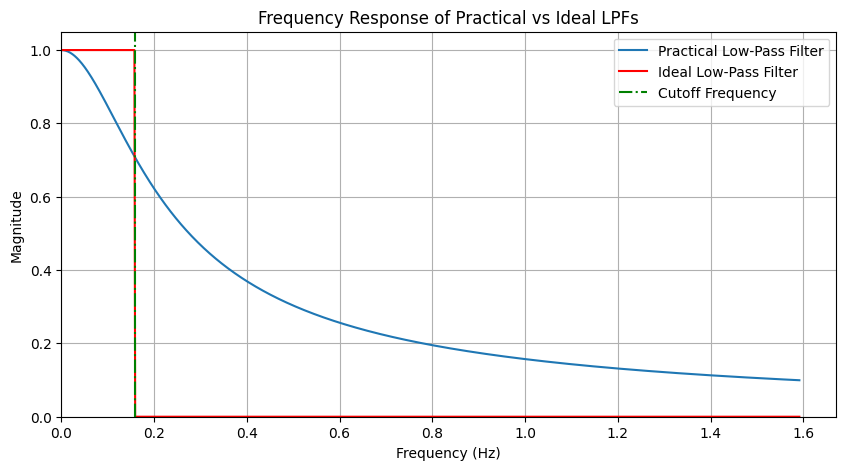

In [31]:
plt.figure(figsize=(10, 5))

# Practical LPF
plt.plot(f, np.abs(H_practical), label='Practical Low-Pass Filter')

#Ideal LPF
plt.plot(f, H_ideal, label='Ideal Low-Pass Filter', color='r')

#Cutoff frequency
plt.axvline(fc, color='g', linestyle='dashdot', label='Cutoff Frequency')

plt.title('Frequency Response of Practical vs Ideal LPFs')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()


The ideal filter has a sharp cutoff at the cutoff frequency. All frequencies below $f_c$ are in the output, while all frequencies above $f_c$ are attenuated. On the other hand, the practical filter shows a gradual roll-off. It can't achieve the perfect cutoff like the ideal filter, leading to a more gradual attenuation of frequencies beyond $f_c$.

## Time Domain Analysis

An Impulse is a signal which is concentrated at one point of time and contains all the frequencies. This makes it easy to see the effects over different frequencies.
To analyse in time domain, we will see the impulse response of the LPF, which is the filter's output when given an impulse input. This helps us understand how the filter reacts to changes in the input signal over time.\
\
For an ideal LPF, we can see a sinc function as the impulse response\
$ h(t) = \frac{\sin(2\pi f_c t)}{\pi t} $, where 
$f_c$ is the cutoff frequency.\
\
For our practical LPF, we will use concepts of fourier transform and get an exponential curve given as\
$ h(t) = \frac{1}{RC} e^{-\frac{t}{RC}} $

#### Time range and Impulse Responses

In [46]:
t = np.linspace(-10 * RC, 10 * RC, 1000)

# Impulse response of ideal LPF
h_ideal = np.sinc(2 * fc * t)

# Impulse response of my LPF
h_practical = (1 / RC) * np.exp(-np.abs(t) / RC)

#### Plotting

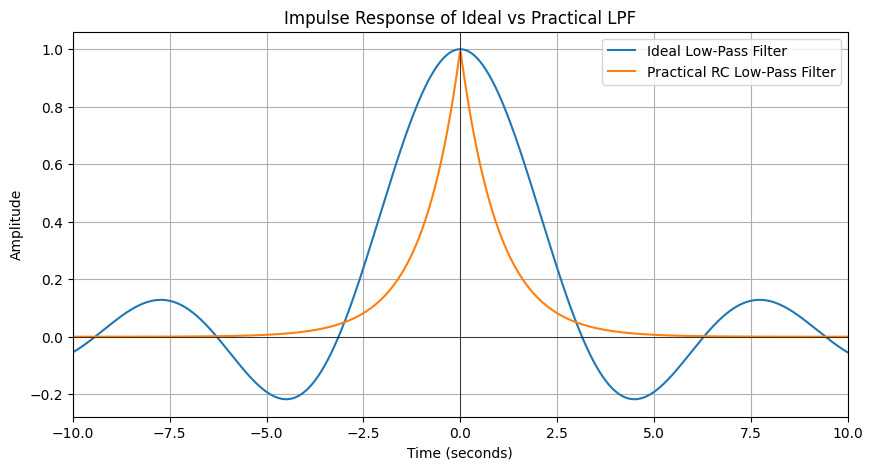

In [53]:

plt.figure(figsize=(10, 5))

plt.plot(t, h_ideal, label='Ideal Low-Pass Filter')
plt.plot(t, h_practical, label='Practical RC Low-Pass Filter')

plt.title('Impulse Response of Ideal vs Practical LPF')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(left=-10*RC, right=10*RC)
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.grid(True)

The practical filter’s response is an exponentially decaying function, while the ideal filter’s response is a sinc function. The practical filter’s impulse response shows how it smoothly responds to changes in the input, compared to the ideal filter's theoretically infinite response.

## Conclusion
We can create a practical LPF using resistors and capacitors. They show a gradual attenuation of frequencies beyond a cutoff frequency $f_c$ and show an exponentially decaying impulse response.